In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
!pip install pygraphviz

Defaulting to user installation because normal site-packages is not writeable
  Using cached pygraphviz-1.11.zip (120 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pygraphviz
Failed to build pygraphviz
  Running setup.py install for pygraphviz: started
  Running setup.py install for pygraphviz: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [48 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\pygraphviz
  copying pygraphviz\agraph.py -> build\lib.win-amd64-cpython-39\pygraphviz
  copying pygraphviz\graphviz.py -> build\lib.win-amd64-cpython-39\pygraphviz
  copying pygraphviz\scraper.py -> build\lib.win-amd64-cpython-39\pygraphviz
  copying pygraphviz\testing.py -> build\lib.win-amd64-cpython-39\pygraphviz
  copying pygraphviz\__init__.py -> build\lib.win-amd64-cpython-39\pygraphviz
  creating build\lib.win-amd64-cpython-39\pygraphviz\tests
  copying pygraphviz\tests\test_attribute_defaults.py -> build\lib.win-amd64-cpython-39\pygraphviz\tests
  copying pygraphviz\tests\test_clear.py -> build\lib.win-amd64-cpython-39\pygraphviz\tests
  copying pygraphviz\tests\test_close.py -> build\l

In [3]:
df = pd.read_excel("Data/Sample-Networking.xlsx",sheet_name = 'CONNECTIONS')
df

,NAME_or_INITIALS,PROXIMITY,FREQUENCY,SENIOR,MIDDLE,JUNIOR,FUNCTIONAL,SEX,RACE,UNIT,FIRM,INDUSTRY,NATIONALITY
0,Type the name or initials of your contact,How close is this individual to you? [1=Distan...,How often do you communicate with this individ...,Is this person in the 60-80 years age bracket?...,Is this person in the 35-59 years age bracket?...,Is this person in the 18-34 years age bracket?...,Is this person from a functional or product ar...,Identify the sex of the individual (0 for fema...,Identify the race of the individual (0 for Whi...,Is this person from a different business unit ...,Is this person from a different firm than your...,Is this person from a different industry than ...,To which country does your contact belong to? ...
1,Vuletich,4,1,1,0,0,1,1,0,1,0,0,US
2,Zhou,4,1,1,0,0,1,1,4,0,0,0,US
3,Tonse,3,1,1,0,0,1,1,5,0,0,0,US
4,van der Velden,3,1,0,1,0,1,1,0,0,0,0,US
5,Nair,1,1,0,0,1,1,1,3,1,0,0,US
6,Robertson,2,2,1,0,0,1,1,0,1,0,0,US
7,Tewari,3,1,1,0,0,1,1,3,0,1,1,India
8,Chicas,2,2,1,0,0,1,1,1,1,0,0,US
9,Davison,2,2,0,1,0,1,0,0,1,0,0,US


In [4]:
df.drop(0, inplace=True)
df

,NAME_or_INITIALS,PROXIMITY,FREQUENCY,SENIOR,MIDDLE,JUNIOR,FUNCTIONAL,SEX,RACE,UNIT,FIRM,INDUSTRY,NATIONALITY
1,Vuletich,4,1,1,0,0,1,1,0,1,0,0,US
2,Zhou,4,1,1,0,0,1,1,4,0,0,0,US
3,Tonse,3,1,1,0,0,1,1,5,0,0,0,US
4,van der Velden,3,1,0,1,0,1,1,0,0,0,0,US
5,Nair,1,1,0,0,1,1,1,3,1,0,0,US
6,Robertson,2,2,1,0,0,1,1,0,1,0,0,US
7,Tewari,3,1,1,0,0,1,1,3,0,1,1,India
8,Chicas,2,2,1,0,0,1,1,1,1,0,0,US
9,Davison,2,2,0,1,0,1,0,0,1,0,0,US
10,Rout,3,1,0,1,0,1,1,0,1,0,0,US


In [5]:
df.columns = df.columns.str.strip()

In [6]:
SENIOR = df['SENIOR'].value_counts()
SENIOR

0    15
1     8
Name: SENIOR, dtype: int64

In [7]:
MIDDLE = df['MIDDLE'].value_counts()
MIDDLE

1    13
0    10
Name: MIDDLE, dtype: int64

In [8]:
JUNIOR = df['JUNIOR'].value_counts()
JUNIOR

0    21
1     2
Name: JUNIOR, dtype: int64

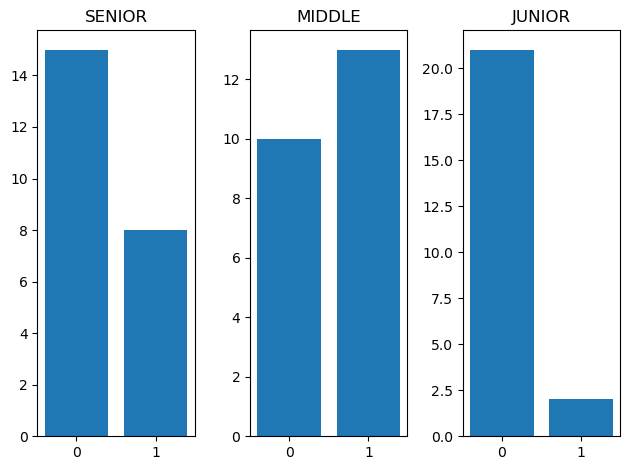

In [9]:
# Given value counts
senior_counts = {'0': 15, '1': 8}
middle_counts = {'0': 10, '1': 13}
junior_counts = {'0': 21, '1': 2}

# Bar chart for SENIOR
plt.subplot(1, 3, 1)
plt.bar(list(senior_counts.keys()), list(senior_counts.values()))
plt.title('SENIOR')

# Bar chart for MIDDLE
plt.subplot(1, 3, 2)
plt.bar(list(middle_counts.keys()), list(middle_counts.values()))
plt.title('MIDDLE')

# Bar chart for JUNIOR
plt.subplot(1, 3, 3)
plt.bar(list(junior_counts.keys()), list(junior_counts.values()))
plt.title('JUNIOR')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [10]:
PROXIMITY = df['PROXIMITY'].value_counts()
PROXIMITY

3    11
2     6
4     4
1     2
Name: PROXIMITY, dtype: int64

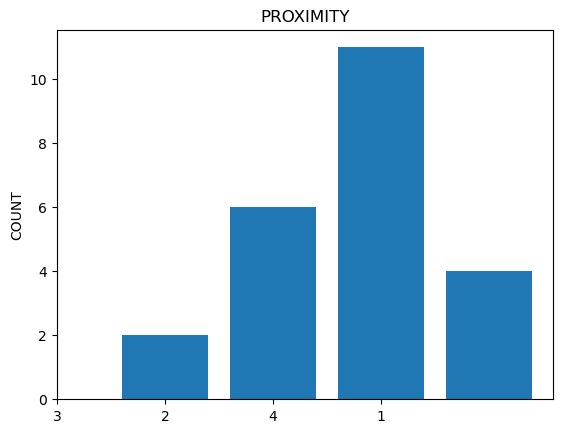

In [11]:
plt.title('PROXIMITY')
plt.ylabel("COUNT")
plt.bar(PROXIMITY.keys(),PROXIMITY.values)
plt.xticks(range(len(PROXIMITY)), labels=PROXIMITY.keys())
plt.show()

In [12]:
FREQUENCY = df['FREQUENCY'].value_counts()
FREQUENCY

1    16
2     5
3     1
4     1
Name: FREQUENCY, dtype: int64

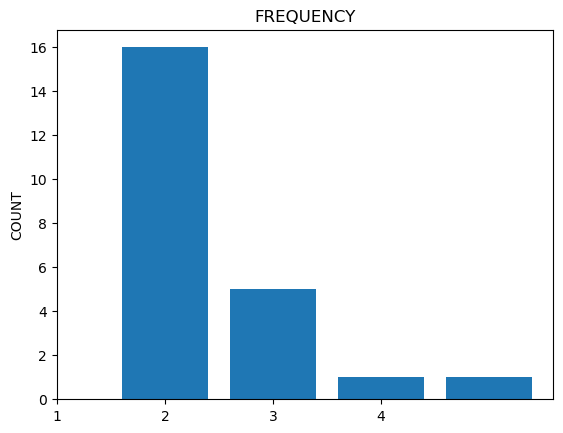

In [13]:
plt.title('FREQUENCY')
plt.ylabel("COUNT")
plt.bar(FREQUENCY.keys(),FREQUENCY.values)
plt.xticks(range(len(FREQUENCY)), labels=FREQUENCY.keys())
plt.show()

In [14]:
FUNCTIONAL = df['FUNCTIONAL'].value_counts()
FUNCTIONAL

1    23
Name: FUNCTIONAL, dtype: int64

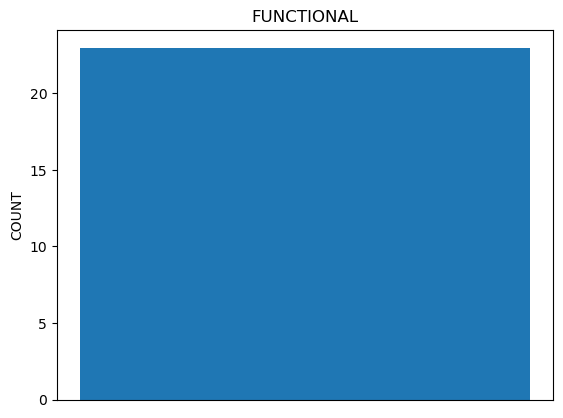

In [15]:
plt.title('FUNCTIONAL')
plt.ylabel("COUNT")
plt.bar(FUNCTIONAL.keys(),FUNCTIONAL.values)
plt.xticks(range(len(FUNCTIONAL)), labels=FUNCTIONAL.keys())
plt.show()

In [16]:
SEX = df['SEX'].value_counts()
SEX

1    14
0     8
2     1
Name: SEX, dtype: int64

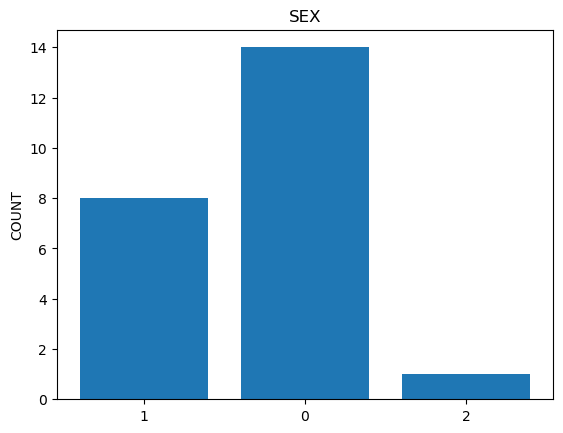

In [17]:
plt.title('SEX')
plt.ylabel("COUNT")
plt.bar(SEX.keys(),SEX.values)
plt.xticks(range(len(SEX)), labels=SEX.keys())
plt.show()

In [18]:
RACE = df['RACE'].value_counts()
RACE

0    13
3     5
4     2
1     2
5     1
Name: RACE, dtype: int64

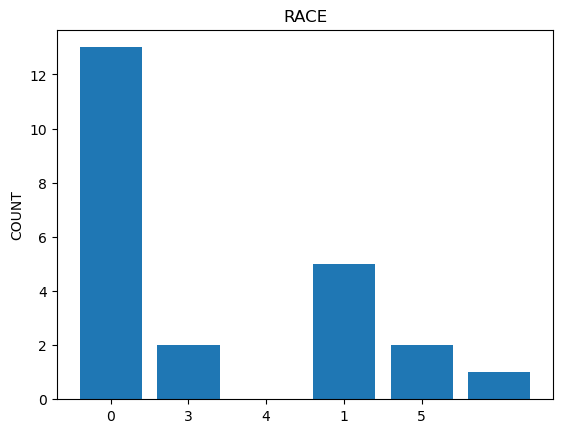

In [19]:
plt.title('RACE')
plt.ylabel("COUNT")
plt.bar(RACE.keys(),RACE.values)
plt.xticks(range(len(RACE)), labels=RACE.keys())
plt.show()

In [20]:
UNIT = df['UNIT'].value_counts()
UNIT

1    15
0     8
Name: UNIT, dtype: int64

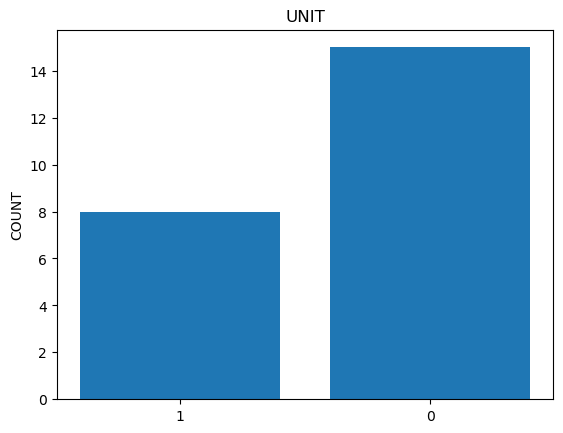

In [21]:
plt.title('UNIT')
plt.ylabel("COUNT")
plt.bar(UNIT.keys(),UNIT.values)
plt.xticks(range(len(UNIT)), labels=UNIT.keys())
plt.show()

In [22]:
FIRM = df['FIRM'].value_counts()
FIRM

0    20
1     3
Name: FIRM, dtype: int64

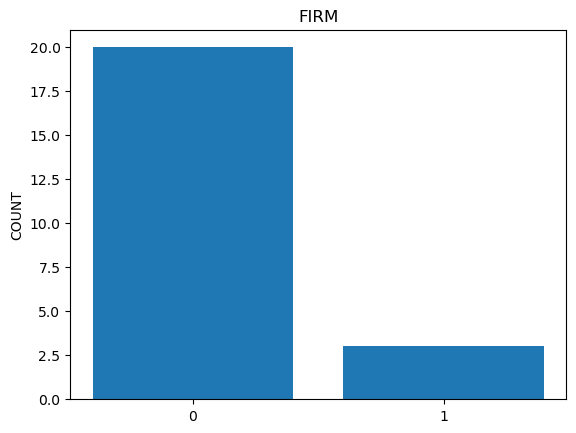

In [23]:
plt.title('FIRM')
plt.ylabel("COUNT")
plt.bar(FIRM.keys(),FIRM.values)
plt.xticks(range(len(FIRM)), labels=FIRM.keys())
plt.show()

In [24]:
INDUSTRY = df['INDUSTRY'].value_counts()
INDUSTRY

0    22
1     1
Name: INDUSTRY, dtype: int64

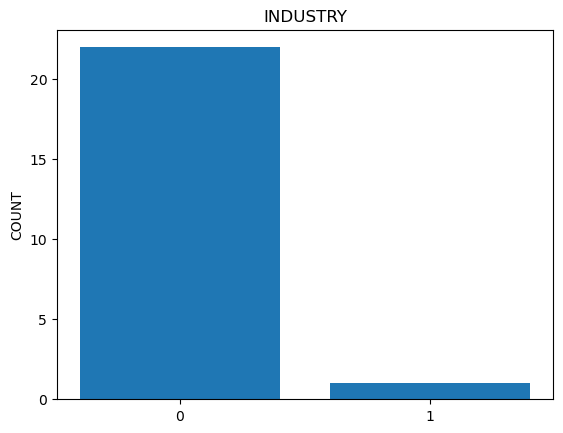

In [25]:
plt.title('INDUSTRY')
plt.ylabel("COUNT")
plt.bar(INDUSTRY.keys(),INDUSTRY.values)
plt.xticks(range(len(INDUSTRY)), labels=INDUSTRY.keys())
plt.show()

In [26]:
NATIONALITY = df['NATIONALITY'].value_counts()
NATIONALITY

US        19
India      1
Mexico     1
Poland     1
Italy      1
Name: NATIONALITY, dtype: int64

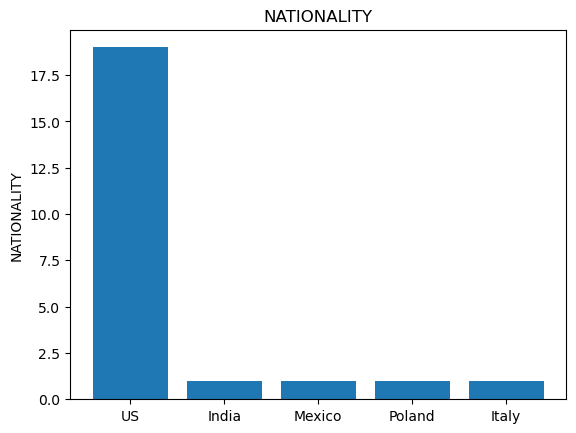

In [27]:
plt.title('NATIONALITY')
plt.ylabel("NATIONALITY")
plt.bar(NATIONALITY.keys(),NATIONALITY.values)
plt.xticks(range(len(NATIONALITY)), labels=NATIONALITY.keys())
plt.show()

# Calculating Network Density

In [28]:
# Set the maximum number of columns to 50
pd.set_option('display.max_columns', 50)

In [29]:
df_net = pd.read_excel("Data/Sample-Networking.xlsx",sheet_name = 'NETWORK')
df_net

,Last Name,Vuletich,Zhou,Tonse,van der Velden,Nair,Robertson,Tewari,Chicas,Davison,Rout,Christiano,Panda,Lendermon,Swami,Johnson,Beltran,Naidu,Bethi,Nimmagadda,Parzecki,Davis,Wall,Forghani Bajestani
0,Vuletich,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Zhou,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Tonse,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,van der Velden,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Nair,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,Robertson,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Tewari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Chicas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Davison,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Rout,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df_net.dtypes

Last Name              object
Vuletich              float64
Zhou                  float64
Tonse                 float64
van der Velden        float64
Nair                  float64
Robertson             float64
Tewari                float64
Chicas                float64
Davison               float64
Rout                  float64
Christiano            float64
Panda                 float64
Lendermon             float64
Swami                 float64
Johnson               float64
Beltran               float64
Naidu                 float64
Bethi                 float64
Nimmagadda            float64
Parzecki              float64
Davis                 float64
Wall                  float64
Forghani Bajestani    float64
dtype: object

In [31]:
df_net.columns

Index(['Last Name', 'Vuletich', 'Zhou', 'Tonse', 'van der Velden', 'Nair',
       'Robertson', 'Tewari', 'Chicas', 'Davison', 'Rout', 'Christiano',
       'Panda', 'Lendermon', 'Swami', 'Johnson', 'Beltran', 'Naidu', 'Bethi',
       'Nimmagadda', 'Parzecki', 'Davis', 'Wall', 'Forghani Bajestani'],
      dtype='object')

In [32]:
# Define the functions for calculating inverse constraint, estimated network size, efficiency
def inverse_constraint(row):
    values = row.dropna().values
    if len(values) == 0:
        return 0
    return np.sum(values) / np.count_nonzero(values == 1)

def estimated_network_size(row):
    return np.sum(row.dropna())

def efficiency(row):
    est_network_size = estimated_network_size(row)
    if est_network_size == 0:
        return 0
    return inverse_constraint(row) / est_network_size

In [33]:
numeric_columns = ['Vuletich', 'Zhou', 'Tonse', 'van der Velden', 'Nair', 'Robertson', 'Tewari', 'Chicas', 'Davison', 'Rout', 'Christiano', 'Panda', 'Lendermon', 'Swami', 'Johnson']
df_net['Inverse_Constraint'] = df_net[numeric_columns].apply(inverse_constraint, axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_11504\3843829563.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum(values) / np.count_nonzero(values == 1)


In [34]:
# Apply the calculations to the DataFrame
numeric_columns = df_net.columns[1:-3]  # Exclude 'Last Name' and the last three columns
df_net['Inverse_Constraint'] = df_net[numeric_columns].apply(inverse_constraint, axis=1)
df_net['Estimated_Network_Size'] = df_net[numeric_columns].apply(estimated_network_size, axis=1)
df_net['Efficiency'] = df_net[numeric_columns].apply(efficiency, axis=1)
df_net['Inverse_Constraint'].fillna(0,inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_11504\3843829563.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum(values) / np.count_nonzero(values == 1)


In [35]:
df_net

,Last Name,Vuletich,Zhou,Tonse,van der Velden,Nair,Robertson,Tewari,Chicas,Davison,Rout,Christiano,Panda,Lendermon,Swami,Johnson,Beltran,Naidu,Bethi,Nimmagadda,Parzecki,Davis,Wall,Forghani Bajestani,Inverse_Constraint,Estimated_Network_Size,Efficiency
0,Vuletich,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.333333
1,Zhou,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,Tonse,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.000000
3,van der Velden,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.000000
4,Nair,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.500000
5,Robertson,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
6,Tewari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.500000
7,Chicas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.000000
8,Davison,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9,Rout,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.000000


In [36]:
df_relation = df_net.drop(columns = ["Inverse_Constraint","Estimated_Network_Size","Efficiency"])
df_relation

,Last Name,Vuletich,Zhou,Tonse,van der Velden,Nair,Robertson,Tewari,Chicas,Davison,Rout,Christiano,Panda,Lendermon,Swami,Johnson,Beltran,Naidu,Bethi,Nimmagadda,Parzecki,Davis,Wall,Forghani Bajestani
0,Vuletich,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Zhou,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Tonse,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,van der Velden,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Nair,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,Robertson,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Tewari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Chicas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Davison,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Rout,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


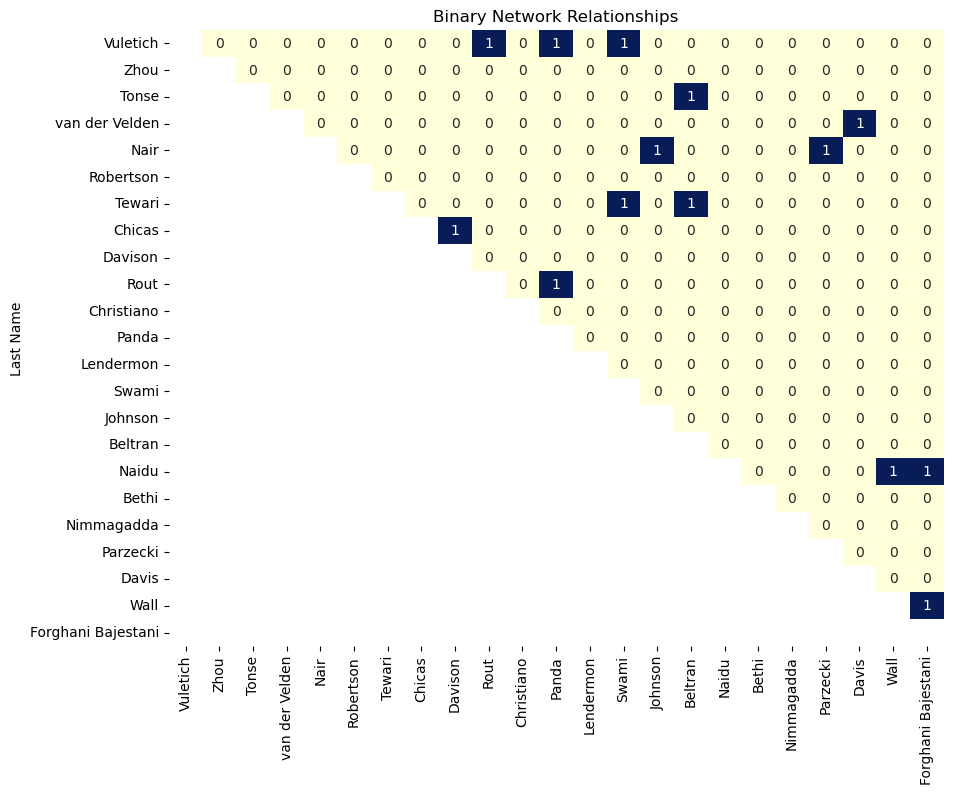

In [37]:
df_relation.set_index("Last Name", inplace=True)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_relation, cmap='YlGnBu', cbar=False, annot=True)
plt.title("Binary Network Relationships")
# Save the heatmap as a JPEG image
#plt.savefig("Data/network_relationships.jpg", format="jpeg")
plt.show()

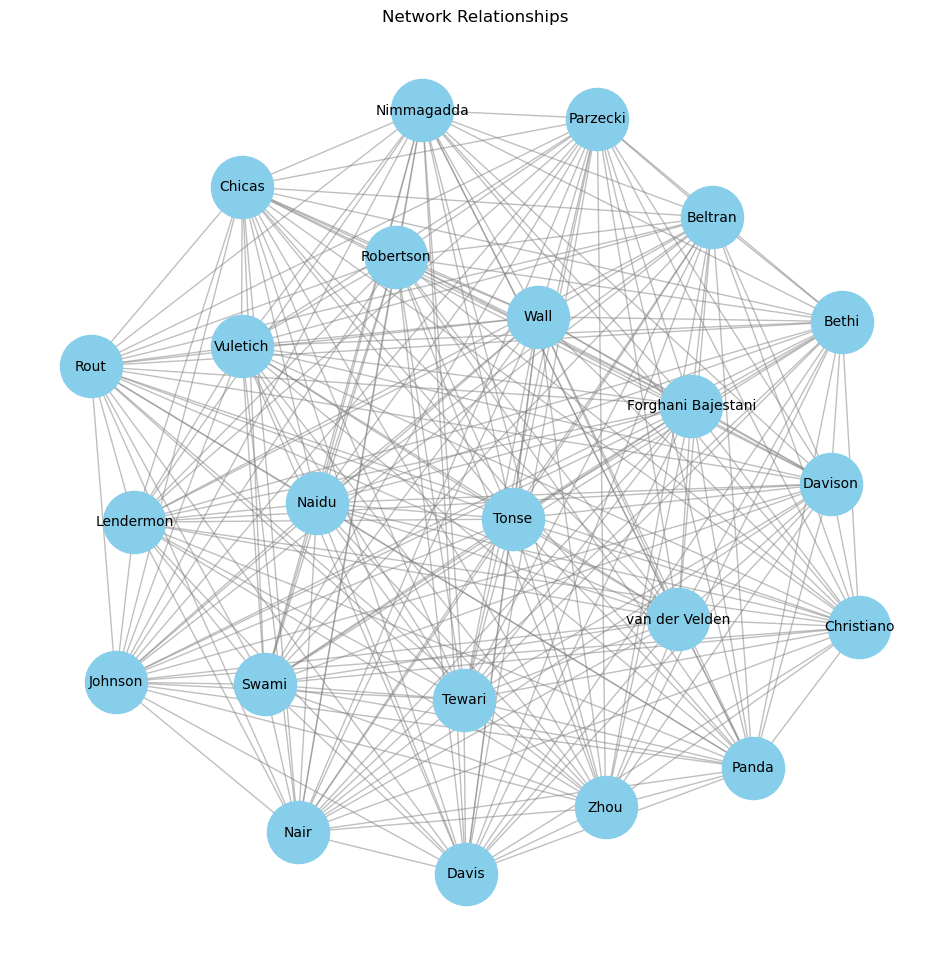

In [38]:
df_relation = df_net.drop(columns = ["Inverse_Constraint","Estimated_Network_Size","Efficiency"])
# Set "Last Name" as the index
df_relation.set_index("Last Name", inplace=True)

# Create a graph
G = nx.Graph()

# Add nodes
for name in df_relation.index:
    G.add_node(name)

# Add edges based on the connections in the DataFrame
for name in df_relation.index:
    for column in df_relation.columns:
        if not pd.isna(df_relation.at[name, column]) and column != name:
            G.add_edge(name, column)

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  # Positions of nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='skyblue')
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
plt.title("Network Relationships")
plt.axis('off')

# Save the plot as a JPEG image
plt.savefig("network_relationships_circles.jpg", format="jpeg")

# Show the plot
plt.show()

In [39]:
df_relation = df_net.drop(columns = ["Inverse_Constraint","Estimated_Network_Size","Efficiency"])
df_relation

,Last Name,Vuletich,Zhou,Tonse,van der Velden,Nair,Robertson,Tewari,Chicas,Davison,Rout,Christiano,Panda,Lendermon,Swami,Johnson,Beltran,Naidu,Bethi,Nimmagadda,Parzecki,Davis,Wall,Forghani Bajestani
0,Vuletich,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Zhou,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Tonse,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,van der Velden,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Nair,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,Robertson,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Tewari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Chicas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Davison,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Rout,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


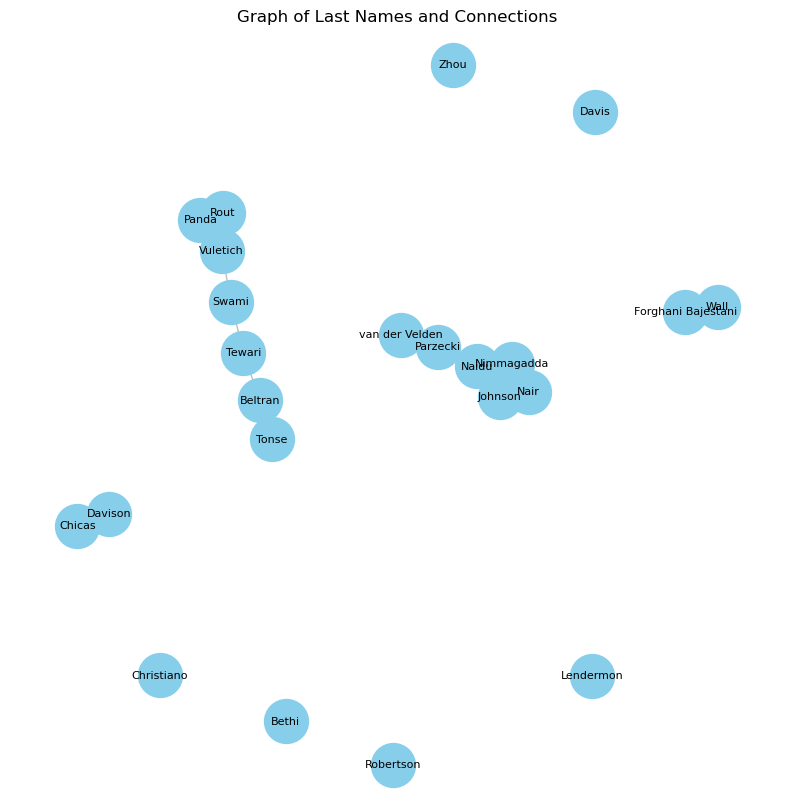

In [40]:
import numpy as np

data = {
    "Last Name": ["Vuletich", "Zhou", "Tonse", "van der Velden", "Nair", "Robertson", "Tewari", "Chicas",
                  "Davison", "Rout", "Christiano", "Panda", "Lendermon", "Swami", "Johnson", "Beltran",
                  "Naidu", "Bethi", "Nimmagadda", "Parzecki", "Davis", "Wall", "Forghani Bajestani"],
    "Vuletich": [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Zhou": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Tonse": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    "van der Velden": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    "Nair": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    "Robertson": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Tewari": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    "Chicas": [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Davison": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Rout": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Christiano": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Panda": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Lendermon": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Swami": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Johnson": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Beltran": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Naidu": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
    "Bethi": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Nimmagadda": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Parzecki": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Davis": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Wall": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    "Forghani Bajestani": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}

import pandas as pd

df_relation = pd.DataFrame(data)
#df_relation.set_index("Last Name", inplace=True)

# Create a DataFrame
df_relation = pd.DataFrame(data)

# Create a graph
G = nx.Graph()

# Add nodes for each last name
last_names = df_relation['Last Name'].tolist()
G.add_nodes_from(last_names)

# Iterate through the DataFrame and add edges where the value is 1
for _, row in df_relation.iterrows():
    last_name = row['Last Name']
    connections = [col for col, value in row.items() if value == 1 and col != last_name]
    G.add_edges_from([(last_name, connection) for connection in connections])

# Draw the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw_networkx_nodes(G, pos, nodelist=last_names, node_color='skyblue', node_size=1000)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1.0, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')
plt.title("Graph of Last Names and Connections")
plt.axis('off')
plt.savefig("network_relationships_connections.jpg", format="jpeg")
plt.show()